In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 파일 읽어오기

In [2]:
corona_table = pd.read_csv('corona_table.csv')
corona_table[:2]

,기준일,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
0,2020-01-20,1,1,0,0,4
1,2020-01-21,0,1,0,0,15


In [3]:
corona_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   기준일         742 non-null    object
 1   확진자수        742 non-null    int64 
 2   누적확진자수      742 non-null    int64 
 3   사망자수        742 non-null    int64 
 4   누적사망자수      742 non-null    int64 
 5   누적의심신고검사자수  742 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 34.9+ KB


In [4]:
# 기준일 타입 변경
corona_table.기준일 = pd.to_datetime(corona_table.기준일)
corona_table.dtypes

기준일           datetime64[ns]
확진자수                   int64
누적확진자수                 int64
사망자수                   int64
누적사망자수                 int64
누적의심신고검사자수             int64
dtype: object

In [5]:
corona_table[-2:]

,기준일,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
740,2022-01-30,17522,828611,20,6732,21448119
741,2022-01-31,17077,845688,23,6755,21518073


In [6]:
corona_table.확진자수.sum()

845688

In [7]:
corona_table.사망자수.sum()

6755

In [8]:
# 확진자가 가장 많은 날 : 행 추출
corona_table.sort_values(by='확진자수', ascending=False)[:1]

,기준일,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
740,2022-01-30,17522,828611,20,6732,21448119


In [9]:
# 사망자가 가장 많은 날 : 행 추출
corona_table.sort_values(by='사망자수', ascending=False)[:1]

,기준일,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
702,2021-12-23,6914,589961,109,5015,18859285


2020년 1월 20일 ~ 2022년 1월 31일 기간 중
확진자 수가 가장 높았던 날은 2022년 1월 30일로 17522명이었고, 
사망자 수가 가장 높았던 날은 2021년 12월 23일로 109명이었다.

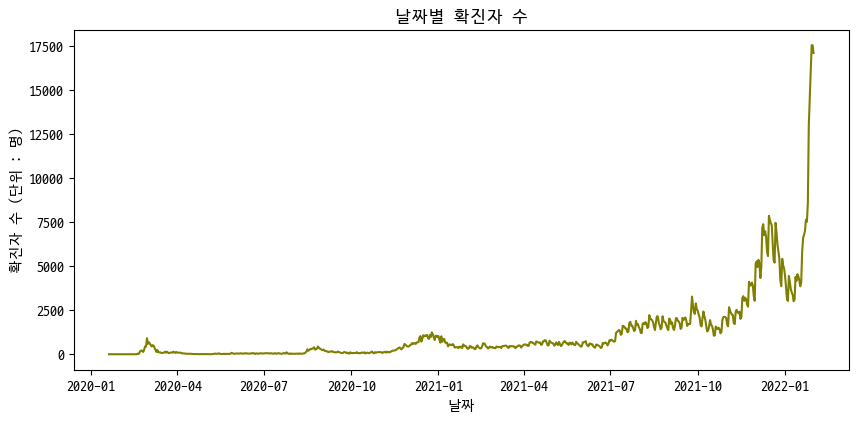

In [10]:
# 일별 확진자 수
plt.rc('font', family='D2coding')
corona_table.plot(x='기준일', 
                  y='확진자수', 
                  figsize=(10, 5), 
                  legend=False, 
                  rot=0, 
                  title='날짜별 확진자 수',
                  xlabel='날짜',
                  ylabel='확진자 수 (단위 : 명)',
                  color='olive',
                 )
# x축 눈금 레이블 : 가운데 정렬
# ha = ['left', 'center', 'right']
plt.xticks(ha='center')
plt.show()

<Axes: xlabel='기준일', ylabel='확진자수'>

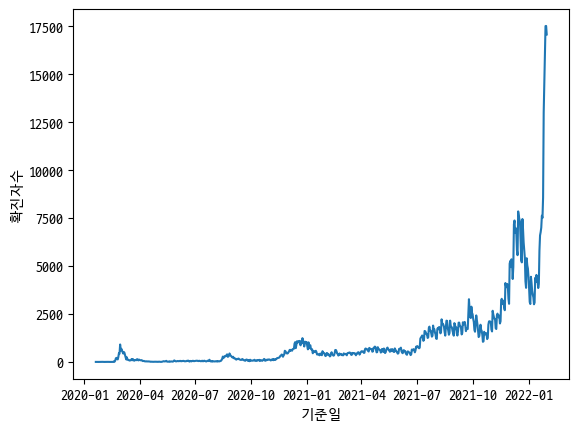

In [11]:
sns.lineplot(data=corona_table, 
             x='기준일', 
             y='확진자수'
            )

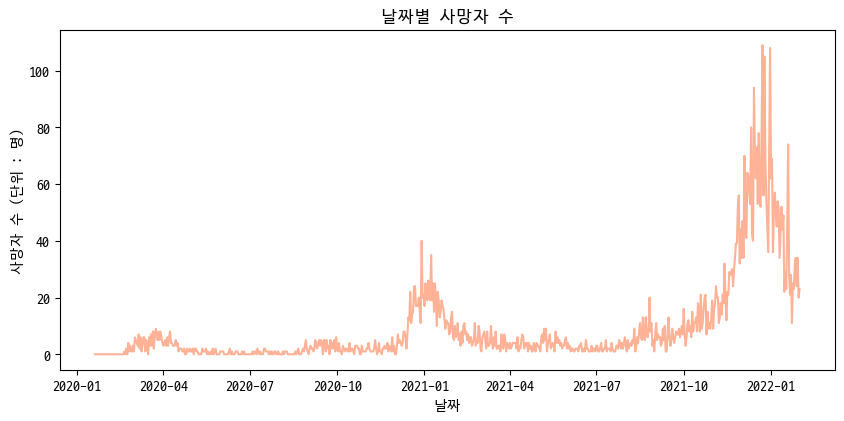

In [12]:
# 날짜별 사망자 수 
corona_table.plot(x='기준일', 
                  y='사망자수',
                  rot=0,
                  figsize=(10, 5),
                  legend=False,
                  title='날짜별 사망자 수',
                  xlabel='날짜',
                  ylabel='사망자 수 (단위 : 명)',
                  color='coral',
                  alpha=0.6
                 )
plt.xticks(ha='center')
plt.show()

<Axes: xlabel='기준일', ylabel='사망자수'>

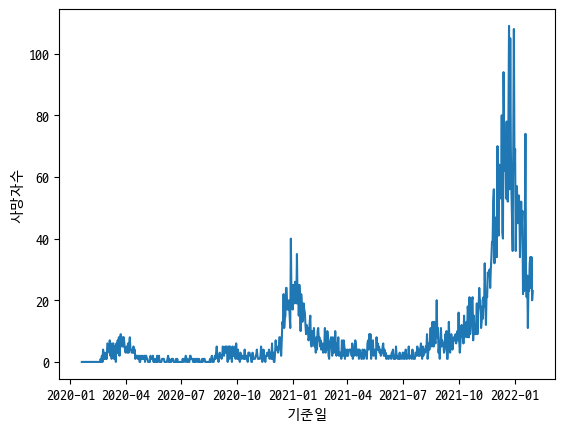

In [13]:
sns.lineplot(data=corona_table, x='기준일', y='사망자수')

<Axes: title={'center': '날짜별 확진자 수와 사망자 수'}, xlabel='날짜'>

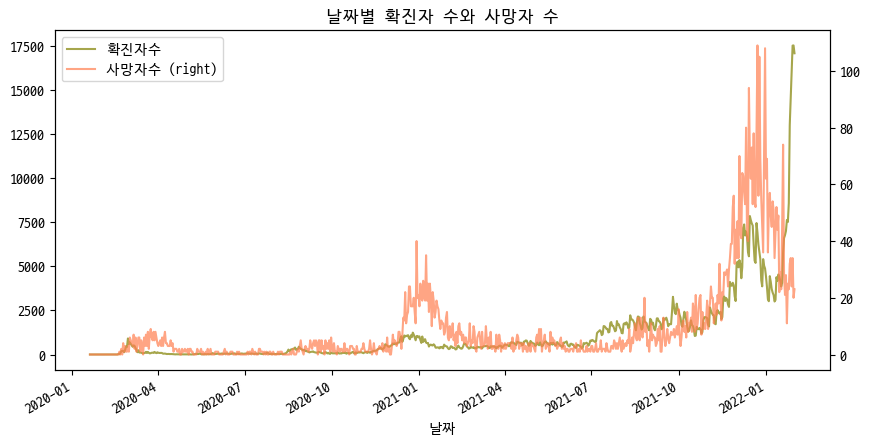

In [14]:
# 날짜별 확진자 수와 사망자 수
corona_table[['기준일', '확진자수', '사망자수']].plot(x='기준일',
                                           figsize=(10, 5), 
                                           xlabel='날짜',
                                           color=['olive', 'coral'],
                                           secondary_y='사망자수',
                                           alpha=0.7,
                                           title='날짜별 확진자 수와 사망자 수',
                                          )

In [15]:
# 월별 확진자 수와 사망자 수
corona_table.기준일.dt.year

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
737    2022
738    2022
739    2022
740    2022
741    2022
Name: 기준일, Length: 742, dtype: int32

In [19]:
# 연도별 그룹화
g_y = corona_table.groupby(corona_table.기준일.dt.year)

In [20]:
g_y.get_group(2020)

,기준일,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
0,2020-01-20,1,1,0,0,4
1,2020-01-21,0,1,0,0,15
2,2020-01-22,0,1,0,0,21
3,2020-01-23,0,1,0,0,25
4,2020-01-24,1,2,0,0,29
...,...,...,...,...,...,...
341,2020-12-27,970,56859,15,808,4006406
342,2020-12-28,806,57665,11,819,4038300
343,2020-12-29,1044,58709,40,859,4098173
344,2020-12-30,1050,59759,20,879,4159516


In [25]:
# 연도별 합
g_y.sum(numeric_only=True)

,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
기준일,,,,,
2020,60726,5949023,900,103691,513952592
2021,570102,79737991,4663,824940,4074074842
2022,214860,21908081,1192,194438,634968707


In [28]:
# 월별 합
g_month = corona_table.groupby(corona_table.기준일.dt.month)

In [30]:
g_month.get_group(1)

,기준일,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
0,2020-01-20,1,1,0,0,4
1,2020-01-21,0,1,0,0,15
2,2020-01-22,0,1,0,0,21
3,2020-01-23,0,1,0,0,25
4,2020-01-24,1,2,0,0,29
...,...,...,...,...,...,...
737,2022-01-27,14514,777483,34,6654,21196354
738,2022-01-28,16093,793576,24,6678,21269304
739,2022-01-29,17513,811089,34,6712,21377393
740,2022-01-30,17522,828611,20,6732,21448119


In [31]:
g_month.sum(numeric_only=True)

,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
기준일,,,,,
1,232342,24111724,1712,231918,789492003
2,14387,2363282,199,42577,173354766
3,20270,3231889,274,54478,230260588
4,19906,3691377,182,60052,264839419
5,19034,4409974,154,66656,311421134
6,17954,4832380,71,68059,339661053
7,42880,5874385,96,72684,389072675
8,58720,7486381,213,77036,437483004
9,63728,9070927,285,82474,480489695


In [34]:
# 월별 확진자수가 가장 많은 데이터(행)
g_month.sum(numeric_only=True).sort_values(by='확진자수', ascending=False)[:1]

,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
기준일,,,,,
1,232342,24111724,1712,231918,789492003


In [60]:
# 월별 사망자수가 가장 많은 데이터(행)
g_month.sum(numeric_only=True).sort_values(by='사망자수', ascending=False)[:1]

,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
기준일,,,,,
12,210133,18264020,2313,161284,679190252


In [35]:
corona_table.기준일.dt.strftime('%Y')

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
737    2022
738    2022
739    2022
740    2022
741    2022
Name: 기준일, Length: 742, dtype: object

In [39]:
corona_table.기준일.dt.strftime('%y')

0      20
1      20
2      20
3      20
4      20
       ..
737    22
738    22
739    22
740    22
741    22
Name: 기준일, Length: 742, dtype: object

In [36]:
corona_table.기준일.dt.strftime('%m')

0      01
1      01
2      01
3      01
4      01
       ..
737    01
738    01
739    01
740    01
741    01
Name: 기준일, Length: 742, dtype: object

In [37]:
corona_table.기준일.dt.strftime('%d')

0      20
1      21
2      22
3      23
4      24
       ..
737    27
738    28
739    29
740    30
741    31
Name: 기준일, Length: 742, dtype: object

In [38]:
corona_table.기준일.dt.strftime('%D')

0      01/20/20
1      01/21/20
2      01/22/20
3      01/23/20
4      01/24/20
         ...   
737    01/27/22
738    01/28/22
739    01/29/22
740    01/30/22
741    01/31/22
Name: 기준일, Length: 742, dtype: object

## 월별 확진자 수와 사망자 수가 높았던 날 (행) 추출

In [44]:
# 년-월 기준으로 사망자 수가 가장 높았던 년-월 추출
g_year_month = corona_table.groupby(corona_table.기준일.dt.strftime('%y-%m'))

In [45]:
g_year_month.sum(numeric_only=True).sort_values(by='사망자수', ascending=False)[:1]

,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
기준일,,,,,
21-12,183606,16828211,1939,140974,568932067


In [61]:
g_year_month.sum(numeric_only=True).sort_values(by='확진자수', ascending=False)[:1]

,확진자수,누적확진자수,사망자수,누적사망자수,누적의심신고검사자수
기준일,,,,,
22-01,214860,21908081,1192,194438,634968707


확진자 수가 가장 높았던 달은 2022년 1월로 214,860명이었고,
사망자 수가 가장 높았던 달은 2021년 12월로 1,939명이었다.

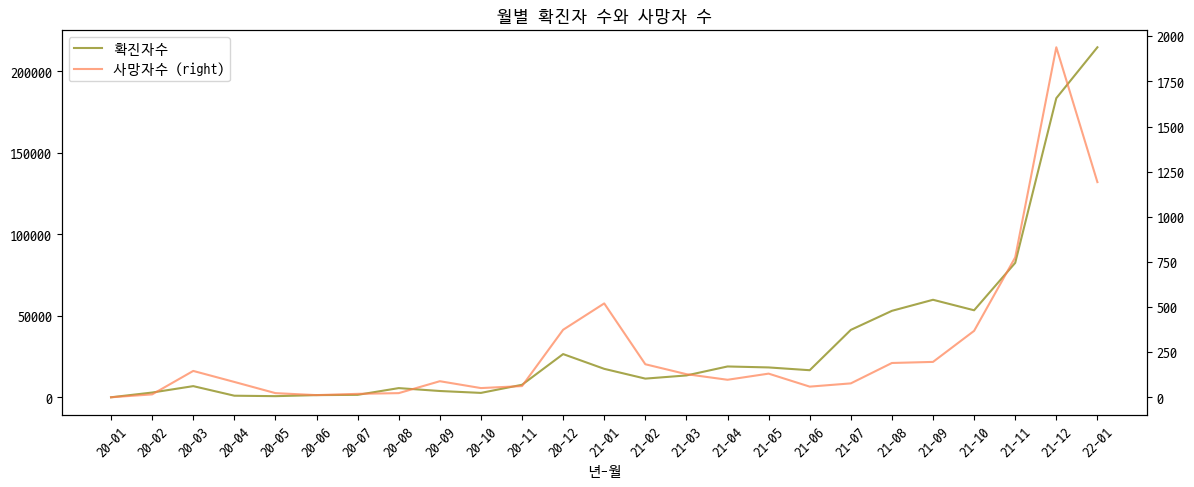

In [57]:
g_year_month[['확진자수', '사망자수']].sum(numeric_only=True).plot(figsize=(14, 5),
                                                           secondary_y='사망자수',
                                                           color=['olive', 'coral'],
                                                           alpha=0.7,
                                                           title='월별 확진자 수와 사망자 수',
                                                           xlabel='년-월',
                                                           rot=45,
                                                          )
plt.xticks(range(len(g_year_month.indices)), labels=g_year_month.indices)
plt.show()

2020년 1월 20일 ~ 2022년 1월 31일 기간 중
확진자 수가 가장 높았던 날은 2022년 1월 30일로 17522명이었고, 
사망자 수가 가장 높았던 날은 2021년 12월 23일로 109명이었다.

확진자 수가 가장 높았던 달은 2022년 1월로 214,860명이었고,
사망자 수가 가장 높았던 달은 2021년 12월로 1,939명이었다.